In [97]:
import numpy as np
import pandas as pd
boulder = np.load("Boulder3.npy",allow_pickle = True)
Greenbelt = np.load("Greenbelt.npy",allow_pickle = True)
print(boulder)

[['nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['-105.2418' '39.986176' '2.4904359e-05' '1.342167e-05' 'mol m-2'
  '2019-06-07T18:56:56.014000Z']
 ...
 ['-105.23735' '39.988377' '8.214416e-05' '5.2048457e-05' 'mol m-2'
  '2019-04-12T19:46:50.597000Z']
 ['nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['nan' 'nan' 'nan' 'nan' 'nan' 'nan']]


In [98]:
def get_df(city):
    NO2_trop_col = []
    time = []
    uncertainty = []
    lat = []
    lon = []
    for i in city:
        if i[0] != i[1]:
            time.append(i[5])
            NO2_trop_col.append(float(i[2])*6.02e19)
            uncertainty.append(float(i[3])*6.02e19)
            lat.append(float(i[1]))
            lon.append(float(i[0]))
        else:
            pass
    city_df = pd.DataFrame({'timestamp':time,'NO2_trop_col':NO2_trop_col,'uncertainty':uncertainty,'lon':lon,'lat':lat})
    city_df['timestamp'] = pd.to_datetime(city_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    city_df = city_df.sort_values(by = 'timestamp')
    city_df = city_df[(city_df['timestamp']>='20190101')&(city_df['timestamp']<='201912312359')]
    return city_df

In [99]:
def get_df2(city):
    NO2_trop_col = []
    time = []
    uncertainty = []
    lat = []
    lon = []
    for i in city:
        if i[0] != i[1]:
            time.append(i[4])
            NO2_trop_col.append(float(i[2])*6.02e19)
            uncertainty.append(float(i[3])*6.02e19)
            lat.append(float(i[1]))
            lon.append(float(i[0]))
        else:
            pass
    city_df = pd.DataFrame({'timestamp':time,'NO2_trop_col':NO2_trop_col,'uncertainty':uncertainty,'lon':lon,'lat':lat})
    city_df['timestamp'] = pd.to_datetime(city_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    city_df = city_df.sort_values(by = 'timestamp')
    city_df = city_df[(city_df['timestamp']>='20190101')&(city_df['timestamp']<='201912312359')]
    return city_df

In [100]:
Boulder_df = get_df(boulder)
Greenbelt_df = get_df2(Greenbelt)

In [101]:
Greenbelt_df

,timestamp,NO2_trop_col,uncertainty,lon,lat
77,2019-01-02 17:40:22.949000,1.055122e+16,1.067346e+16,-76.881090,38.993584
144,2019-01-03 19:02:03.161999,8.156537e+14,3.260666e+15,-76.892860,38.976795
3,2019-01-04 17:03:20.366000,7.120531e+15,1.086683e+16,-76.694180,39.086174
18,2019-01-06 18:05:15.591999,2.712973e+15,8.696199e+14,-76.836100,38.975426
99,2019-01-08 19:08:24.889999,6.483286e+15,2.655602e+15,-76.813156,39.011390
...,...,...,...,...,...
43,2019-12-23 18:23:46.678000,9.176318e+15,2.803719e+15,-76.839030,38.990200
45,2019-12-24 18:04:57.826000,5.497816e+15,1.678176e+15,-76.845430,38.985226
138,2019-12-26 19:08:06.705000,8.069569e+15,2.825104e+15,-76.870040,38.981583
173,2019-12-27 18:49:03.931000,7.595226e+15,3.776196e+15,-76.836044,39.010136


In [126]:
import matplotlib.pyplot as plt
def plot_errorbar(df):
    x = df['timestamp']
    y = df['NO2_trop_col']
    yerr = df['uncertainty']
    fig, ax = plt.subplots()
    ax.errorbar(x, y,yerr=yerr,ecolor='y')
    plt.xlabel(xlabel='time')
    plt.ylabel(ylabel='NO2_trop_col (molecules/cm^2)')
    plt.show()

In [122]:
import seaborn as sns
def plot_hist(df):
    ax1 = sns.distplot(df['NO2_trop_col'], rug=True, hist=True)
    plt.show()

# Data Processing

# Greenbelt

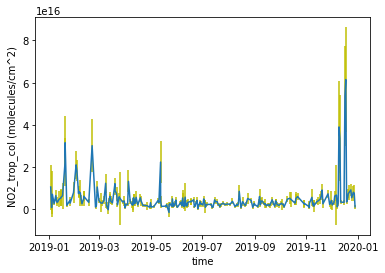

In [127]:
plot_errorbar(Greenbelt_df)

c:\users\张心怡\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\张心怡\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


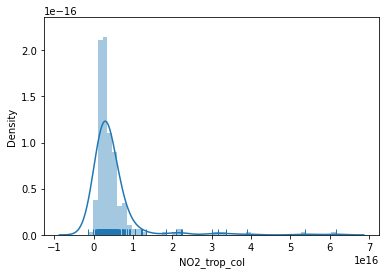

In [105]:
plot_hist(Greenbelt_df)

# Boulder

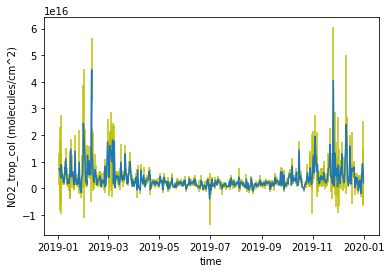

In [128]:
plot_errorbar(Boulder_df)

c:\users\张心怡\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\张心怡\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


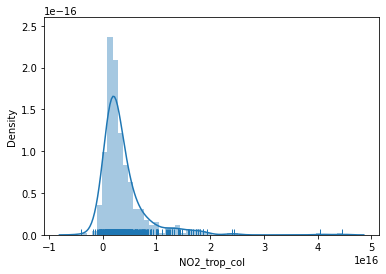

In [125]:
plot_hist(Boulder_df)